<center><img src='https://drive.google.com/uc?export=view&id=1qJ8NqAZolTBQY7lN-deZ8xEsU3dlUiLz' width=200></center>
<center><img src='https://upload.wikimedia.org/wikipedia/commons/a/a4/Logo-essec.jpg' width=200></center>


<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Bachelor AIDAMS</center>
<center>Regression</center>
    <center> Lab 3 : Bike Rental prediction </center>
<hr style=" border:none; height:3px;">
</h1>


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


### Business Goal:
The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Loading the Dataset `day.csv`, checking it's contents and checking the data quality

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking it's Shape

df.shape

(730, 16)

In [4]:
# Checking if instant column has unique entries, if yes, then will convert it to index

df['instant'].is_unique
df.set_index('instant', inplace = True)

In [5]:
# Setting the instant column as index to number of columns
print('Number of columns after setting instant as index:', df.shape[1])

Number of columns after setting instant as index: 15


Since the Model is to be built for <b>cnt</b> column, <b>casual</b> and <b>registed</b> are redundant here. It should not be used to build the model, thus dropping these two columns before further processing.

In [6]:
# dropping unnecessary columns

casual = df.pop('casual')
registered = df.pop('registered')

In [7]:
# Checking Columns Data Types

df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [12]:
# Converting the dteday to Date Time
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df['dteday'].head()

instant
1   2018-01-01
2   2018-01-02
3   2018-01-03
4   2018-01-04
5   2018-01-05
Name: dteday, dtype: datetime64[ns]

In [13]:
# Changing the month number to month abbr for better view
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [14]:
# Since season, weekday and weathesit are basically categorical values, converting them to string type for future use

df['season']=df['season'].astype('str')
df['weekday']=df['weekday'].astype('str')
df['weathersit']=df['weathersit'].astype('str')
df.dtypes

dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 79.8+ KB


In [16]:
# Checking the % of null values in each column

df.isnull().mean()*100


dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [17]:
# Checking the range of values, for example temperature, humidity etc
range_df = pd.DataFrame(columns=['temp', 'hum', 'windspeed', 'atemp'])
range_df.loc[0] = [df['temp'].min(), df['hum'].min(), df['windspeed'].min(), df['atemp'].min()]
range_df.loc[1] = [df['temp'].max(), df['hum'].max(), df['windspeed'].max(), df['atemp'].max()]
range_df.index = ['Min', 'Max']
range_df    


,temp,hum,windspeed,atemp
Min,2.424346,0.00,1.500244,3.95348
Max,35.328347,97.25,34.000021,42.04480


In [18]:
# Converting the weather variable into more understanable text

def weather_desc(x):
    if x == '1':
        return 'Clear, Few clouds, Partly cloudy, Partly cloudy'
    elif x == '2':
        return 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
    elif x == '3':
        return 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
    else:
        return 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
    
df['weathersit_desc'] = df['weathersit'].apply(weather_desc)
df[['weathersit', 'weathersit_desc']].drop_duplicates()
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weathersit_desc
instant,,,,,,,,,,,,,,
1,2018-01-01,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,2018-01-02,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
3,2018-01-03,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,2018-01-04,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,"Clear, Few clouds, Partly cloudy, Partly cloudy"
5,2018-01-05,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [21]:
# Converting the seasons into specific season names for better understanding
def season_name(x):
    if x == '1':
        return 'Spring'
    elif x == '2':
        return 'Summer'
    elif x == '3':
        return 'Fall'
    else:
        return 'Winter'

df['season_name']=df['season'].apply(season_name)
df.head(100)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weathersit_desc,season_name
instant,,,,,,,,,,,,,,,
1,2018-01-01,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring
2,2018-01-02,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring
3,2018-01-03,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring
4,2018-01-04,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring
5,2018-01-05,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2018-04-06,2,0,Apr,0,3,1,1,16.024153,19.38040,47.0833,17.625221,2808,"Clear, Few clouds, Partly cloudy, Partly cloudy",Summer
97,2018-04-07,2,0,Apr,0,4,1,1,17.937500,21.68480,60.2917,10.874904,3141,"Clear, Few clouds, Partly cloudy, Partly cloudy",Summer
98,2018-04-08,2,0,Apr,0,5,1,2,13.769153,16.22395,83.6250,15.208464,1471,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Summer


### Visualizing the data

In [22]:
# Checking linear relationship between the cnt variable and other numeric variables

numeric_features=df.select_dtypes(include=['int64','float64'])
numeric_features.corr()['cnt'].sort_values(ascending=False)


cnt           1.000000
atemp         0.630685
temp          0.627044
yr            0.569728
workingday    0.062542
holiday      -0.068764
hum          -0.098543
windspeed    -0.235132
Name: cnt, dtype: float64

We should see that there is some corelation between Feeling Temperature and sales. Also the count in 2019 are much higher than the count in 2018 for all circumstances.

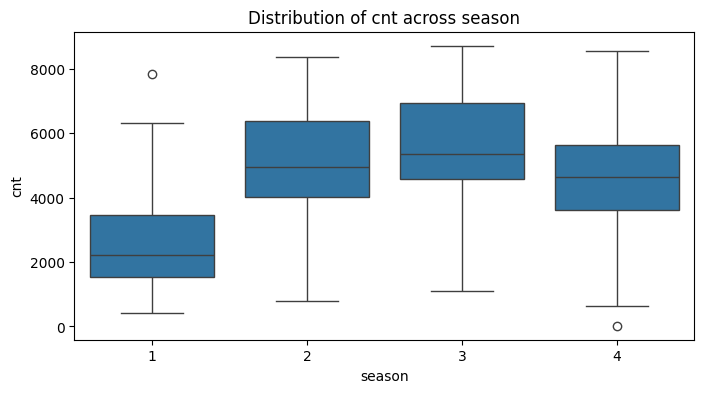

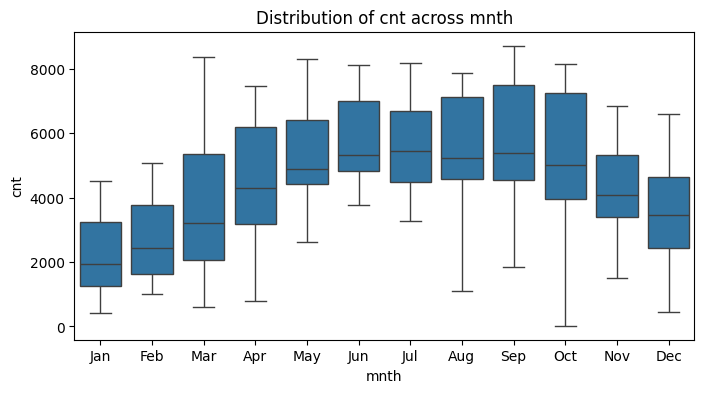

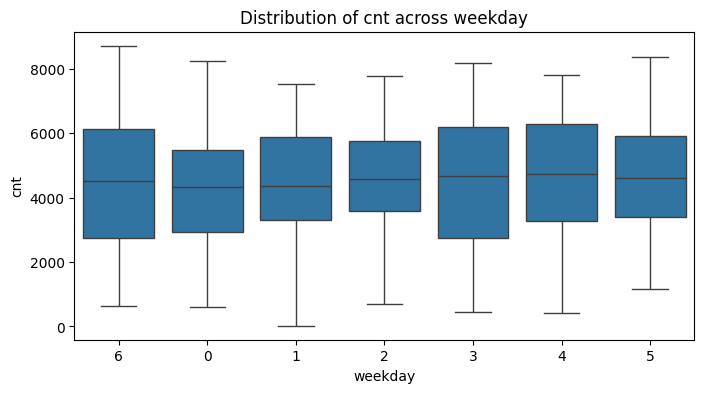

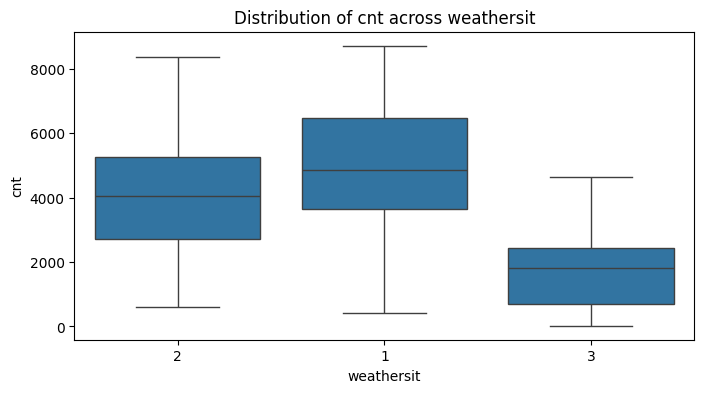

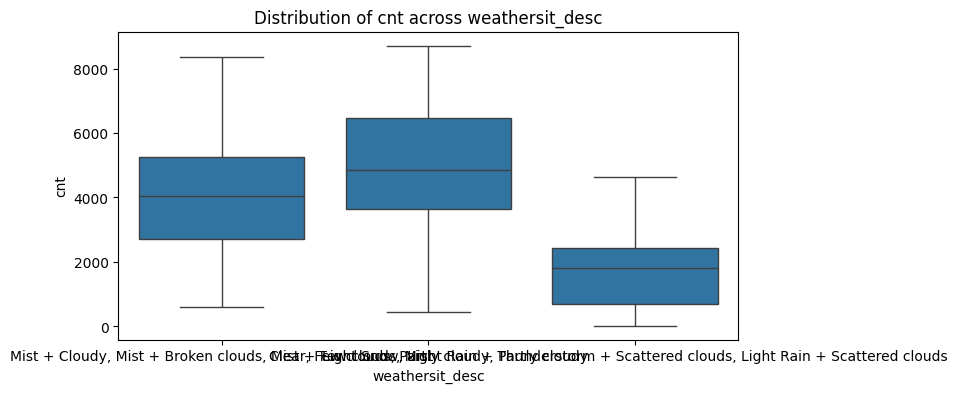

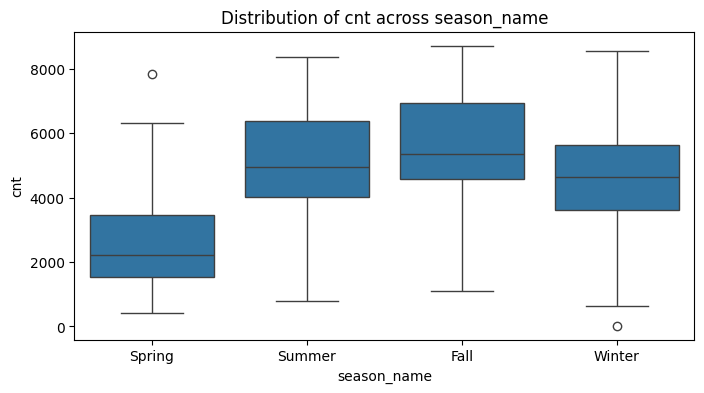

In [23]:
# Checking the distribution of rentals across different categorical variables

categorical_features=df.select_dtypes(include=['object'])
for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y='cnt', data=df)
    plt.title(f'Distribution of cnt across {col}')
    plt.show()
    

What do you observe ? 

Bike rentals peak in summer and fall, drop sharply in winter.
Weather is a major factor, clear days drive more rentals.
Weekdays have little influence on counts
The monthly trend closely mirrors the seasonal cycle

Count picks up in Good Weather days

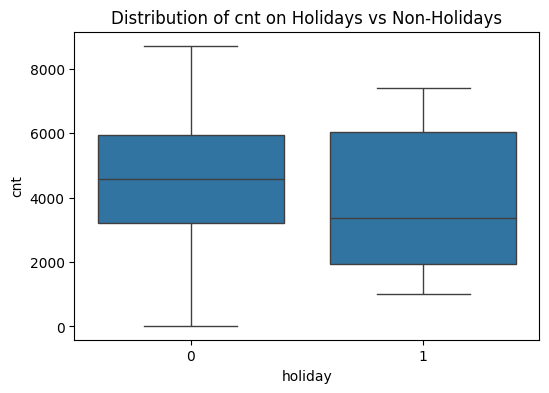

In [24]:
# Checking business on Holidays

plt.figure(figsize=(6,4))
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('Distribution of cnt on Holidays vs Non-Holidays')
plt.show()

What do you observe ?

Bike demand is stronger on non-holidays, likely driven by patterns of the day rather than leisure activities

In [ ]:
# Total rentals on different days of the week.


What do you observe ?

In [ ]:
# Checking business on Workingdays


### Creating Dummy Variables for Categorical Data
#### We need to create dummy variables for the following columns.
- season
- mnth
- weekday
- weathersit

In [ ]:
dummy = pd.get_dummies(df[['season','mnth','weekday','weathersit']], drop_first=True)
dummy.head()

In [ ]:
df = pd.concat([df,dummy], axis=1)   #Axis=1 is for horizontal stacking
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)
df.head()

In [ ]:
print('Shape of the new dataframe is:' , df.shape)

In [ ]:
# Since we have the month and the Year in two seperate columns, we do not need the date column anymore, thus dropping it


In [ ]:
# Moving the cnt to the end for easier identification


### Splitting the data into Train and Test Dataset

In [ ]:
# print the shape of the train and test data

In [ ]:
# Checking the Train Data


Other than the numeric fields, all other categorical values have been encoded. Now we can go ahead and scale the data.

### Feature Scaling

In [ ]:
# Do a MinMax scaling (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


In [ ]:
# Checking the Heatmap


What do you observe in terms of colinerity with <b>cnt</b> and between the different features ? 

### Building the Model
Since the number of columns is 29, which is manageable, we first build a model with all the columns, and then keep removing the columns based upon Statistical Significance and Co-Linearity.<br>
We will stop when we notice that there is no further improvement in the R2 value or all variables are statistically significant with low VIF.

<b>There wil be several iterations before getting the perfect model</b>

In [ ]:
# Appling OLS model
y_train = df_train.pop('cnt')
X_train = df_train
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

In [ ]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Are there insignificant variables and variables with strong multicollinearity ? If yes, you need to get rid of them.

In the following cells, you will follow the same process in an iterative manner till you build a robust model. First you will remove all columns with High P Values and then when the P Values are acceptable for all the columns, you will check their VIF and remove them.

In [ ]:
# Removing 'mnth_Mar' due to high P-Value and appling OLS again
X = X_train.drop('mnth_Mar',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model2 = lr.fit()
lr_model2.summary()

In [ ]:
# Removing 'weekday_4' due to high P-Value and appling OLS again


In [ ]:
# Removing 'mnth_Oct' due to high P-Value and appling OLS again


In [ ]:
# Removing 'mnth_Jun' due to high P-Value and appling OLS again


In [ ]:
# Removing 'weekday_3' due to high P-Value and appling OLS again


In [ ]:
# Removing 'atemp' due to high P-Value


In [ ]:
# Removing 'weekday_5' due to high P-Value


In [ ]:
# Removing 'mnth_Aug' due to high P-Value


In [ ]:
# Removing 'weekday_2' due to high P-Value


In [ ]:
# Removing 'weekday_1' due to high P-Value


In [ ]:
# Removing 'mnth_May' due to high P-Value


In [ ]:
# Removing 'mnth_Feb' due to high P-Value


We now see that all the variables have a P Value <= 0.05, which signifies that these variables are statistically significant. Let's now check if there is any Multi-Colinearity among these variables.

In [ ]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs


What do you observe ?

In [ ]:
# Removing 'hum' due to high VIF


In [ ]:
#Checking the VIF Again


Does it looks like an acceptable model ? 

In [ ]:
# Checking the co-efficients of the final model 


### Validating the assumptions of Linear Regression
- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals (absence of auto-correlation)
- Normality of Errors

In [ ]:
# Validating Linear Relationship


The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. As we can see in the above graph, the linearity is well respected.

In [ ]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable


As we can see in the above plot, Homoscedasticity is well respected since the variance of the residuals are almost constant.

In [ ]:
# Validating Multi Colinearity


All variables have less than 0.56 correlation with eachother. Checking the VIF now.

Taking 10 as the maximum VIF permissible for this model, we decide on keeping these colmns based upon business assumptions.

In [ ]:
# Independence of residuals (absence of auto-correlation)
# Autocorrelation refers to the fact that observations’ errors are correlated
# To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 
# The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables
# (0–2: positive auto-correlation, 2–4: negative auto-correlation)


There is almost nill auto-correlation

In [ ]:
# Normality of Errors


# Ploting the histogram of the error terms


The error terms are normally distributed

### Making prediction using the final model

In [ ]:
# Scaling the Test Dataset with the Scaler of the Training Set


In [ ]:
# Dividing into X_test and y_test


In [ ]:
# Adding the constant column

# Removing all the columns which has been removed from the last model


In [ ]:
# Making prediction using the last Model 14


### Model Evaluation

In [ ]:
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_test_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_test_pred))

In [ ]:
# As asked in problem statement
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

Write the equation of your best fitted line developed by your last model : 



Write your recommandation to the bike sharing company.